In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_csv('house_price.csv')
y = pd.read_csv('y.csv')

In [34]:
data.head(20)

LotFrontage   LotArea    Street  LotShape  Utilities  LandSlope  \
0            65  9.042040  1.098612  1.609438   1.609438   1.386294   
1            80  9.169623  1.098612  1.609438   1.609438   1.386294   
2            68  9.328212  1.098612  1.386294   1.609438   1.386294   
3            60  9.164401  1.098612  1.386294   1.609438   1.386294   
4            84  9.565284  1.098612  1.386294   1.609438   1.386294   
5            85  9.555064  1.098612  1.386294   1.609438   1.386294   
6            75  9.218804  1.098612  1.609438   1.609438   1.386294   
7             0  9.247925  1.098612  1.386294   1.609438   1.386294   
8            51  8.719481  1.098612  1.609438   1.609438   1.386294   
9            50  8.912069  1.098612  1.609438   1.609438   1.386294   
10           70  9.323758  1.098612  1.609438   1.609438   1.386294   
11           85  9.386392  1.098612  1.386294   1.609438   1.386294   
12            0  9.470317  1.098612  1.098612   1.609438   1.386294   
13           91  9.273597  1.098612  1.386294   1.609438   1.386294   
14            0  9.298443  1.098612  1.386294   1.609438   1.386294   
15           51  8.719481  1.098612  1.609438   1.609438   1.386294   
16            0  9.327412  1.098612  1.386294   1.609438   1.386294   
17           72  9.286560  1.098612  1.609438   1.609438   1.386294   
18           66  9.524859  1.098612  1.609438   1.609438   1.386294   
19           70  8.930759  1.098612  1.609438   1.609438   1.386294   

    OverallQual  OverallCond  YearBuilt  YearRemodAdd          ...            \
0             7     1.791759   7.602900      7.602900          ...             
1             6     2.197225   7.589336      7.589336          ...             
2             7     1.791759   7.601902      7.602401          ...             
3             7     1.791759   7.557995      7.586296          ...             
4             8     1.791759   7.601402      7.601402          ...             
5             5     1.791759   7.597898      7.598900          ...             
6             8     1.791759   7.603399      7.603898          ...             
7             7     1.945910   7.587817      7.587817          ...             
8             7     1.791759   7.566311      7.576097          ...             
9             5     1.945910   7.570443      7.576097          ...             
10            5     1.791759   7.583756      7.583756          ...             
11            9     1.791759   7.603898      7.604396          ...             
12            5     1.945910   7.582229      7.582229          ...             
13            7     1.791759   7.604396      7.604894          ...             
14            6     1.791759   7.581210      7.581210          ...             
15            7     2.197225   7.565275      7.601902          ...             
16            6     2.079442   7.586296      7.586296          ...             
17            4     1.791759   7.584773      7.584773          ...             
18            5     1.791759   7.603399      7.603399          ...             
19            5     1.945910   7.580189      7.583756          ...             

    SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                0             0             0            1   
1                0             0             0            1   
2                0             0             0            1   
3                0             0             0            1   
4                0             0             0            1   
5                0             0             0            1   
6                0             0             0            1   
7                0             0             0            1   
8                0             0             0            1   
9                0             0             0            1   
10               0             0             0            1   
11               0             1             0            0   
12          

In [35]:
data_pickup = data.iloc[:,[0,1,3,4,]]

C:\Users\yutaw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


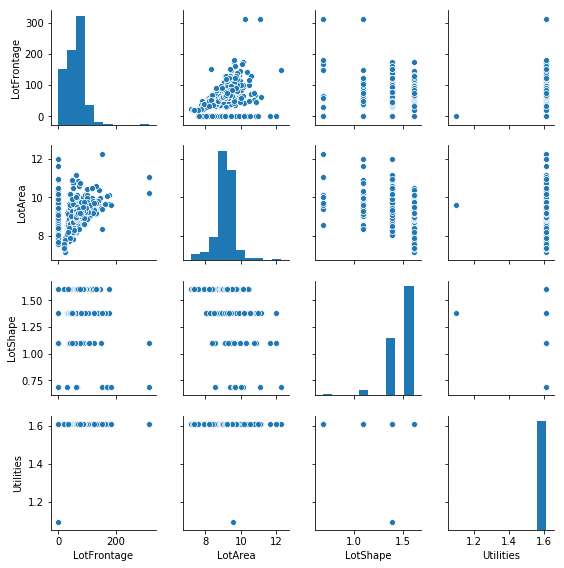

In [36]:
import seaborn as sns
sns.pairplot(data_pickup, size=2.0)
plt.show()

In [37]:
data_pickup.corr()

LotFrontage   LotArea  LotShape  Utilities
LotFrontage     1.000000  0.262012  0.092415   0.043535
LotArea         0.262012  1.000000 -0.362155  -0.023404
LotShape        0.092415 -0.362155  1.000000   0.023427
Utilities       0.043535 -0.023404  0.023427   1.000000

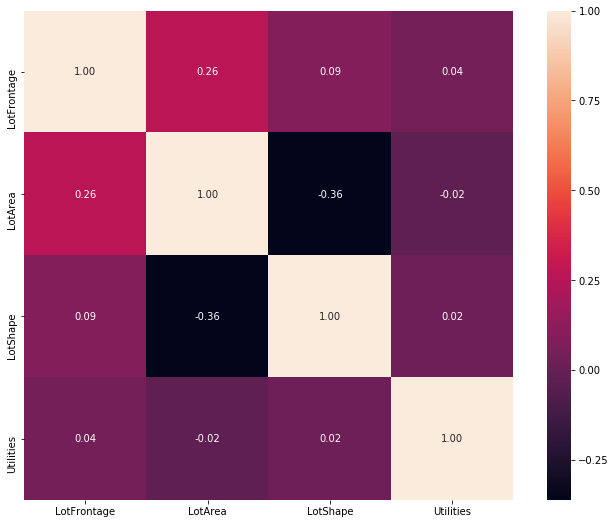

In [38]:
# ヒートマップの表示
plt.figure(figsize=(12, 9))
# annot : 数値を表示するかどうか(annotation)
# square: 四角を正方形に合わせるかどうか
# fmt   : 表示する数値の形式(formatting)
sns.heatmap(data_pickup.corr(), annot=True, square=True, fmt='.2f')
plt.show()

In [39]:
X = data_pickup.iloc[:,[0]].values

In [49]:
X.fillna(df.mean(X))

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

In [41]:
y = y.values

In [42]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [44]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
# 決定係数をtrainとtestに分けて出力
# 過学習しているかどうかを確認
print('R^2')
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

R^2
train: 0.037
test : 0.057


In [46]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.035314
test : 0.052709


In [47]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse

# RMSEをtrainとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_train)) ** (1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_test)) ** (1/2)))

RMSE
train: 76634.331
test : 80010.749


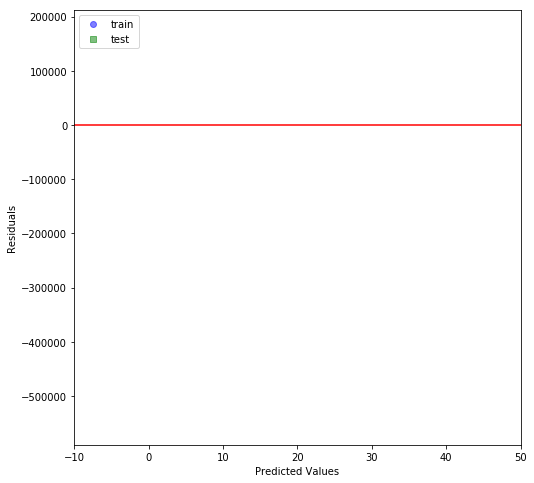

In [48]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()
# 残差プロットを出力
res_plot(y_train, lr.predict(X_train), y_test, lr.predict(X_test))